In [175]:
import numpy as np

def distFunc(a, b):
    return np.linalg.norm(a - b)

def range_query(X, data, eps, distFunc):
    neighbors = []
    for i, point in enumerate(X):
        if distFunc(data, point) <= eps:
            neighbors.append(i)
    return neighbors    # return all neighbors index in <X>

def custom_DBSCAN(X, distFunc, eps, minPts):
    clusters = -1 # clusters label number
    labels = np.ones(len(X)) * -2   # -2 means undefined
    for i, data in enumerate(X):
        if (labels[i] != -2): continue  # already classified

        neighbors = range_query(X, data, eps, distFunc)
        if len(neighbors) < minPts:
            labels[i] = -1 # noise
            continue

        clusters += 1
        labels[i] = clusters  # assign cluster label

        seed = neighbors.copy()
        i = 0
        while i < len(seed):
            point = seed[i]
            if labels[point] == -1:   # noise
                labels[point] = clusters  # change noise to cluster label
            if labels[point] != -2:  
                i += 1
                continue  # already have label

            labels[point] = clusters  # assign cluster label
            n = range_query(X, X[point], eps, distFunc)    # find neighbor
            if len(n) >= minPts:
                seed.extend(n)
            i += 1

    return labels

if __name__ == '__main__':
    x = np.array([[1, 2], [2, 3], [3, 4], [8, 7], [8, 8], [25, 80]])
    l = custom_DBSCAN(x, distFunc, 5, 3)
    print("Self DBSCAN:", l)

    from sklearn.cluster import DBSCAN
    clustering = DBSCAN(eps=5, min_samples=3).fit(x)
    print("Sklearn DBSCAN:", clustering.labels_)  # print the labels assigned by sklearn's DBSCAN

Self DBSCAN: [ 0.  0.  0. -1. -1. -1.]
Sklearn DBSCAN: [ 0  0  0 -1 -1 -1]


In [176]:
# random seed
import random
random.seed(0)
np.random.seed(0)
seed = 0

In [177]:
import numpy as np
import os

MFCC = 13 # num of MFCC features

mfcc_folder = '../dataset/mfcc_features'
np_file = os.listdir(mfcc_folder)

# prepare data
X = np.zeros((len(np_file), MFCC)) # (n_samples, n_features)
y = np.zeros(len(np_file), dtype=int)  # (n_samples, )
# each group is one video
filenames = set()
groups = np.zeros(len(np_file), dtype=int)  # (n_samples, )

# load form directory
for i, file in enumerate(np_file):
    mfcc = np.load(os.path.join(mfcc_folder, file))
    X[i] = mfcc.mean(axis=1)    # (MFCC, )
    # 0: normal driving, 1: car crash
    label = 0 if int(file.split('_')[0]) < 5 else 1
    # label = int(file.split('_')[0]) - 1 # index start from 0
    y[i] = label    
    filename = file[file.find('_') + 1:file.rfind('_')]  # segment is the second part of the filename
    # search with set to find unique value
    if filename not in filenames:
        filenames.add(filename)
        groups[i] = len(filenames)
    else:
        groups[i] = list(filenames).index(filename)

print(X[0])  # print the first sample
print(y[0])  # print the label of the first sample
print(groups[0])  # print the group of the first sample

[-398.98666382  113.03168488  -11.29673195   27.68769264    3.6051693
   11.02839375   -4.29368401    7.7390089     3.64515638    5.37020397
   -3.23544407    9.0578289    -4.63530731]
0
1


In [178]:
from sklearn.manifold import TSNE
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)  # print the shape of the transformed data
print(X_tsne[:5])

(410, 2)
[[-25.799154    1.1409385]
 [-26.749025    1.1874604]
 [-27.22062     2.18636  ]
 [-27.5596      2.5579717]
 [-27.083101    1.4397908]]


In [182]:
eps = 2.8
minPts = 4
labels = custom_DBSCAN(X_tsne, distFunc, eps, minPts)
print(labels)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  0.  1.  1.  0.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1

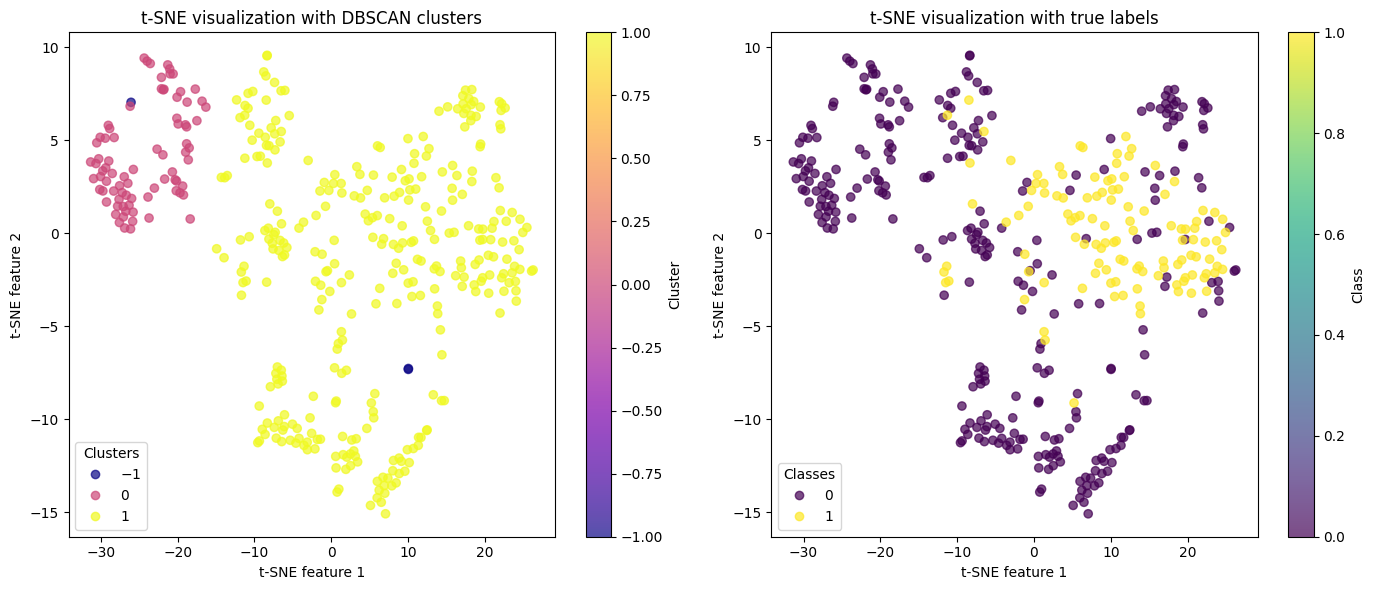

In [183]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# First subplot - DBSCAN clustering results
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='plasma', alpha=0.7)

# Add legend
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('t-SNE visualization with DBSCAN clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(scatter, label='Cluster')

# Second subplot - Ground truth labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)

# Add legend
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('t-SNE visualization with true labels')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(scatter, label='Class')

plt.tight_layout()
plt.show()

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# training
y_pred = custom_DBSCAN(X_tsne, distFunc, eps, minPts)

print(f"Training Accuracy: {accuracy_score(y, y_pred)}")
print(f"Validation Accuracy: {accuracy_score(y, y_pred)}")
print(f"Precision: {precision_score(y, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y, y_pred, average='weighted')}")
# print(f"ROC AUC: {roc_auc_score(y[test_index], y_pred_proba)}")
print(f"Confusion Matrix:\n{confusion_matrix(y, y_pred)}")
print()

Training Accuracy: 0.47804878048780486
Validation Accuracy: 0.47804878048780486
Precision: 0.8174386514507347
Recall: 0.47804878048780486
F1 Score: 0.45493862618398273
Confusion Matrix:
[[  0   0   0]
 [  3  80 211]
 [  0   0 116]]



d:\ancode\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
